# Car Sales Ads Project 

## Introduction

In this project, we will analyze data from a website that sells cars. The data contain information from the different ads that were placed on the site in the past several years, which will help us determine what are the factors that influence the car's price. 

## Open the data file and study the general information. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('vehicles_us.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### Conclusion

1. There are total 51525 rows and 13 columns.
2. We have 5 columns with missing values:
* model_year
* cylinders
* odometer
* paint_color
* is_4wd - This column has significantly more missing values than other columns.
3. We don't have null values.

## Data preprocessing

**First, let's see the first ten rows of the data to get a first feeling of the data.**

In [3]:
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


 **Let's identify, study and fill (when possible and needed) missing values**

First, let's have a look at the number of missing values in each column with the isnull() and sum() methods.

In [4]:
data.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

As we saw at the beginning, the is_4wd column has significantly more missing values than other columns.

Now let's see what is the percentage of the missing values.

In [5]:
data_size = len(data)
missing_per_column = data[['model_year', 'cylinders', 'odometer', 'paint_color', 'is_4wd']].isnull().sum()
missing_per_column / data_size

model_year     0.070238
cylinders      0.102086
odometer       0.153168
paint_color    0.179854
is_4wd         0.503697
dtype: float64

We see here a diversity in the percentage of missing values, which means that the consequences for each variable is different. For example:
* **model_year and cylinders** - Has around or less than 10% of missing values. This means that we can consider dropping the rows that contain those values, due to the "rule" that it's up to 10%. But before doing so, we will check the columns and only then decide what is the best option, because these rows also contain information about other variables. 
* **odometer and paint_color** - Has above 10%, which means that we need to check the columns closely and see if there is a way to fill in the missing values, and if there is, then to find the best way to do so. 
* **is_4wd** - Has 50% missing values. That's a lot! We need to get to the bottom of it and understand it. We need to see if the missing values can be filled in, or maybe these missing values have meaning, which means we need to leave them as they are.


Now let's check the columns one by one and decide what is the best solution for each one.

*model_year* 🚗
***

In [6]:
data[data['model_year'].isnull()].head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60
84,4995,NaN,hyundai elantra,like new,4.0,gas,151223.0,automatic,sedan,custom,NaN,2018-09-15,1
102,10800,NaN,chevrolet colorado,excellent,5.0,gas,114922.0,automatic,truck,red,1.0,2018-06-23,35
114,23700,NaN,nissan frontier crew cab sv,good,6.0,gas,12901.0,other,pickup,black,1.0,2018-09-21,8
116,25300,NaN,chevrolet camaro lt coupe 2d,good,6.0,gas,3568.0,other,coupe,NaN,NaN,2018-06-16,34
144,8995,NaN,chevrolet silverado 1500,excellent,8.0,gas,119726.0,automatic,truck,grey,1.0,2019-03-18,27


We see above that many of the missing values belong to vehicles with automatic transmission. Let's investigate it further. 

In [7]:
data[data['model_year'].isnull()]['transmission'].value_counts()

automatic    3310
manual        187
other         122
Name: transmission, dtype: int64

Indeed we see that most of the missing values in the model_year column belong to vehicles with automatic transmission.
Maybe there was a technical fault with vehicles that has automatic transmission, that caused these missing values to appear.

**model_year** is an important variable for our analysis, so although it has only 7% of missing values, the right choice will be to fill in the missing values to not damage the analysis. 

Now what's left to decide, is how we should fill in the missing values. To do so, let's check if other variables can help us with that important mission.🙅‍♀️

It's known that every car model was manufactured in different years. Let's check if this hypothesis is applied to our dataset with the **model** variable.   

Long story short, we want to see if each model has a different year of production and if so, to fill the missing values in **model_year** with the relevant year by model. 

As we saw earlier, the **model_year** variable is a quantitative variable while the **model** variable is categorical, so we will group the data by **model** and find the mean and the median of **model_year** for each vehicle model, sorted in descending order for our convenience. 

In [8]:
print('These are the means for each vehicle model:')
print('---------------------------------------------')
data.groupby('model')['model_year'].mean().sort_values(ascending = False).head(20)

These are the means for each vehicle model:
---------------------------------------------


model
nissan frontier crew cab sv          2017.414557
chevrolet camaro lt coupe 2d         2015.887372
chevrolet silverado 1500 crew        2015.663121
ford mustang gt coupe 2d             2015.148410
ford f150 supercrew cab xlt          2014.677524
chevrolet cruze                      2014.142523
nissan rogue                         2013.976798
kia soul                             2013.757764
chrysler 200                         2013.691964
chevrolet equinox                    2013.163004
ford fusion se                       2013.104167
mercedes-benz benze sprinter 2500    2013.000000
jeep wrangler unlimited              2012.646919
chevrolet traverse                   2012.575163
hyundai elantra                      2012.575064
ford fusion                          2012.513026
chevrolet colorado                   2012.507576
nissan versa                         2012.484375
ford f-250 sd                        2012.437500
kia sorento                          2012.418919
Name: model_ye

In [9]:
print('These are the medians for vehicle model:')
print('---------------------------------------------')
data.groupby('model')['model_year'].median().sort_values(ascending = False).head(20)

These are the medians for vehicle model:
---------------------------------------------


model
nissan frontier crew cab sv          2018.0
chevrolet camaro lt coupe 2d         2017.0
chevrolet silverado 1500 crew        2016.0
ford mustang gt coupe 2d             2016.0
ford f150 supercrew cab xlt          2015.0
chevrolet colorado                   2015.0
nissan rogue                         2015.0
chrysler 200                         2014.0
chevrolet cruze                      2014.0
kia soul                             2014.0
jeep cherokee                        2014.0
jeep wrangler unlimited              2013.0
hyundai elantra                      2013.0
dodge charger                        2013.0
ford fusion se                       2013.0
ford edge                            2013.0
ford focus se                        2013.0
kia sorento                          2013.0
volkswagen passat                    2013.0
mercedes-benz benze sprinter 2500    2013.0
Name: model_year, dtype: float64

We see from the outputs above the there is a significant difference between the means and the medians, which implies that there are outliers that impact the means. Therefore we will use the medians which are more resistant to outliers and anomalies. 

**Filling in the missing values** 

First, let's find the rows with the missing values to check afterward if the filling was done correctly. 

In [10]:
data[data['model_year'].isnull()].head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,1.0,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60


Let's save the first three indices to see if we have done the filling correctly.

In [11]:
index_missing_model_year = data[data['model_year'].isnull()].index[0:3]

Now we will use the transform method to fill in the missing values in the **model_year** and create a new column for that with the name **fixd_model_year**.

In [12]:
data['fixed_model_year'] = data['model_year'].fillna(data.groupby('model')['model_year'].transform(
    'median'))

Now let's check if the filling process was done correctly with the indices we found earlier. 

In [13]:
data.loc[index_missing_model_year,]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,fixed_model_year
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2011.0
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,SUV,silver,1.0,2018-08-05,28,2009.0
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,NaN,2018-09-23,15,2011.0


In [14]:
model_list_check = data.loc[index_missing_model_year,]['model']

In [15]:
data.groupby('model')['model_year'].median().to_frame().query('model in @model_list_check')

,model_year
model,
chevrolet tahoe,2009.0
ford f-150,2011.0


Here we see that the filling process was done successfully, and the corresponding values by the model is matching the median values we found earlier. Yey!🥳

*cylinders* 🔧
***

In [16]:
data[data['cylinders'].isnull()].head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,fixed_model_year
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,2008.0
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22,2013.0
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44,2005.0
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2,2006.0
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17,1966.0
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,1.0,2018-08-07,60,2011.0
75,6950,2005.0,chevrolet tahoe,excellent,NaN,gas,186021.0,automatic,SUV,NaN,1.0,2018-10-30,3,2005.0
87,8499,2009.0,bmw x5,good,NaN,gas,104482.0,automatic,SUV,blue,1.0,2019-03-04,52,2009.0
119,14800,2016.0,kia sorento,like new,NaN,gas,NaN,automatic,SUV,brown,NaN,2019-02-27,93,2016.0
126,25900,2012.0,chevrolet silverado 1500 crew,good,NaN,other,NaN,other,pickup,NaN,1.0,2018-08-31,44,2012.0


Similar to the **model_year** column, we see that most of the missing values belong to cars with automatic transmissiom. Let's dig in!

In [17]:
data[data['cylinders'].isnull()]['transmission'].value_counts()

automatic    4782
manual        306
other         172
Name: transmission, dtype: int64

Indeed, the same as it accured in the **model_year** column, most of the missing values in the **cylinders** variable belongs to vehicles with aoutomatic transmission. It seems that maybe there was technical fault with vehicles with aoutomatic transmission. 

The **cylinders** column is an important variable for our analysis, so although it has around 10% of missing values, the best decision, in this case, will be to fill in the missing values, and not drop them. Now we just need to decide what is the best way to fill in those missing values. 

The **cylinders** column is a quantitative variable, so we will use representative value, mean or median, to fill in the missing values. 

It is known that each model has a different number of cylinders, so it makes sense to try to fill in the missing values in the **cylinders** column according to the appropriate model.

We will group the data by model, calculate the means and medians [with the mean() and median() methods] of the cylinders per model and choose the right way to fill the missing values.  

In [18]:
print('These are the means for each vehicle model:')
print('---------------------------------------------')
data.groupby('model')['cylinders'].mean().sort_values(ascending = False).head(20)

These are the means for each vehicle model:
---------------------------------------------


model
ford econoline                8.528302
ford f-250 sd                 8.205805
ford f-350 sd                 8.162362
ford f350                     8.162162
ford f-250 super duty         8.101852
ford f350 super duty          8.097345
ford f250 super duty          8.096677
ford f-250                    8.032609
ford f250                     8.019544
chevrolet silverado 3500hd    8.000000
ford mustang gt coupe 2d      8.000000
chevrolet silverado 2500hd    7.995175
gmc yukon                     7.993377
gmc sierra 2500hd             7.989822
chevrolet suburban            7.988024
chevrolet corvette            7.986985
cadillac escalade             7.986395
chevrolet tahoe               7.963836
toyota tundra                 7.919561
gmc sierra 1500               7.917275
Name: cylinders, dtype: float64

In [19]:
print('These are the medians for vehicle model:')
print('---------------------------------------------')
data.groupby('model')['cylinders'].median().sort_values(ascending = False).head(20)

These are the medians for vehicle model:
---------------------------------------------


model
gmc sierra                       8.0
ford f-150                       8.0
ford f-250                       8.0
ford f-250 sd                    8.0
ford econoline                   8.0
ford f-250 super duty            8.0
ford f-350 sd                    8.0
ford f150                        8.0
ford f250                        8.0
ford f250 super duty             8.0
ford f350                        8.0
ford f350 super duty             8.0
chevrolet tahoe                  8.0
chevrolet suburban               8.0
chevrolet silverado 3500hd       8.0
chevrolet silverado 2500hd       8.0
chevrolet silverado 1500 crew    8.0
chevrolet silverado 1500         8.0
chevrolet silverado              8.0
ram 1500                         8.0
Name: cylinders, dtype: float64

The results above tell us that every vehicle model has a different number of cylinders, so lucky we checked it out!😎

We see from the output that the means and medians in the **cylinders** column aren't identical and there is a great difference between them. This tells us that there is an outliers that affects the means, so therefore we will use the medians, which are more resistant to outliers and anomalies to fill in the missing values in the **cylinders** column.   

**Filling in the missing values** 

First, let's find the rows with the missing values to check afterward if the filling was done correctly.

In [20]:
data[data['cylinders'].isnull()].head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,fixed_model_year
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,2008.0
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22,2013.0
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44,2005.0
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,SUV,green,NaN,2018-12-20,2,2006.0
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,NaN,2019-01-23,17,1966.0


Let's save the first three indices to see if we have done the filling correctly.

In [21]:
index_missing_cylinders = data[data['cylinders'].isnull()].index[0:3]

To fill in the missing values we will use the transform() method and create a new column to compare the results afterward. 

In [22]:
data['fixed_cylinders'] = data['cylinders'].fillna(data.groupby('model')['cylinders'].transform(
    'median'))

Now let's check if the filling process was done correctly with the indices we found earlier. 

In [23]:
data.loc[index_missing_cylinders,]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,fixed_model_year,fixed_cylinders
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17,2008.0,6.0
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22,2013.0,6.0
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,NaN,2018-07-22,44,2005.0,6.0


In [24]:
model_list_check2 = data.loc[index_missing_cylinders,]['model']
data.groupby('model')['cylinders'].median().to_frame().query('model in @model_list_check2')

,cylinders
model,
chrysler 300,6.0
honda pilot,6.0
toyota tacoma,6.0


Here we see that the filling process was done correctly, and the filled values match the corresponding values of the medians per model that we found earlier.

*odometer*🕵🏻‍♂️
***

In [25]:
data[data['odometer'].isnull()].head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,fixed_model_year,fixed_cylinders
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,2003.0,8.0
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111,2013.0,8.0
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39,2004.0,6.0
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40,2009.0,4.0
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43,2017.0,4.0
29,5495,2010.0,chevrolet impala,excellent,6.0,gas,NaN,automatic,sedan,white,NaN,2019-02-18,20,2010.0,6.0
38,7999,2015.0,chrysler 200,good,4.0,gas,NaN,automatic,sedan,NaN,NaN,2019-03-08,29,2015.0,4.0
41,11995,2017.0,nissan rogue,like new,4.0,gas,NaN,automatic,SUV,silver,1.0,2018-09-20,21,2017.0,4.0
42,34900,2013.0,mercedes-benz benze sprinter 2500,excellent,6.0,diesel,NaN,automatic,van,black,NaN,2019-01-15,16,2013.0,6.0
56,4200,2006.0,jeep grand cherokee,excellent,6.0,gas,NaN,automatic,SUV,white,1.0,2018-07-01,79,2006.0,6.0


What do we see right away? That once again, most of the missing values belong to the vehicles with automatic transmission. But these are only the first 10 rows, let's check the numbers to be sure. 

In [26]:
data[data['odometer'].isnull()]['transmission'].value_counts()

automatic    7186
manual        426
other         280
Name: transmission, dtype: int64

Surprise! 🥳 

Most of the missing values in the **odometer** column belong to vehicles with automatic transmission. 

Let's remember what is the percentage of missing values for the **odometer** variable.

In [27]:
print('Percentage of missing values in the odometer column: {:.2%}'.format(data['odometer'].isnull().sum() / len(data)))

Percentage of missing values in the odometer column: 15.32%


The **odometer** variable has 15.3% of missing values, that a lot. We can't drop these rows because it will skew the data, and we defenetly don't want this. 

The vehicle's mileage in most cases depends on the owner and the way he/she treated the vehicle and the frequency of its use. We don't have such information in our data, so we have 3 options: 
1. To leave the values as it is.
2. To fill it with 'undefined' or 'unknown'.  
3. To fil it with the median.

We will go for the third option and fill the missing values with the mean of the column. We will create a new column with the name **fixed_odometer** for our convenience. 

In [28]:
data['fixed_odometer'] = data['odometer'].fillna(data['odometer'].median())

Let's check that the filling process was done correctly. 

In [29]:
 data[data['odometer'].isnull()].head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,fixed_model_year,fixed_cylinders,fixed_odometer
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,2003.0,8.0,113000.0
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,1.0,2018-05-15,111,2013.0,8.0,113000.0
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,SUV,red,1.0,2018-05-17,39,2004.0,6.0,113000.0
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40,2009.0,4.0,113000.0
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43,2017.0,4.0,113000.0


In [30]:
data['odometer'].median()

113000.0

The values are filled correctly!😄

*paint_color* 🎨
***

In [31]:
data[data['paint_color'].isnull()].head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,fixed_model_year,fixed_cylinders,fixed_odometer
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2011.0,6.0,145000.0
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,2003.0,8.0,113000.0
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,2012.0,4.0,104174.0
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37,2012.0,8.0,140742.0
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8,2007.0,6.0,154000.0
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43,2017.0,4.0,113000.0
31,11999,2017.0,toyota camry le,excellent,4.0,gas,35721.0,automatic,sedan,NaN,NaN,2018-09-13,25,2017.0,4.0,35721.0
34,9500,2008.0,toyota highlander,good,6.0,gas,149799.0,automatic,SUV,NaN,NaN,2018-06-04,121,2008.0,6.0,149799.0
35,14999,2015.0,dodge charger,good,6.0,gas,63037.0,automatic,sedan,NaN,NaN,2018-05-11,37,2015.0,6.0,63037.0
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,NaN,2018-05-05,22,2013.0,6.0,88042.0


As we saw at the previous variables, it seems that most of the missing values of the **paint_color** column belong to vehicles with automatic transmission. Let's investigate. 🕵️‍♀️

In [32]:
data[data['paint_color'].isnull()]['transmission'].value_counts()

automatic    8403
manual        514
other         350
Name: transmission, dtype: int64

The results are similar to what we have already saw in previous columns. Most of the missing values in the **paint_color** belong to vehicles with automatic transmission. 

Let us calculate again the precentage of the missing values to recall. 

In [33]:
print('Percentage of missing values in the paint_color column: {:.2%}'.format(data['paint_color'].isnull().sum() / len(data)))

Percentage of missing values in the paint_color column: 17.99%


The **paint_color** column has 17.99% of missing values, which is a lot! The **paint_color** variable is important for our analysis, so we cannot drop those lines. Also, these rows contain information about other variables of interest, so it would be wrong and irresponsible to drop them.

Nevertheless, it's almost impossible to restore the color of the vehicle with the data that we obtain, so here we also have 2 options (similar to the **odometer**):
1. To leave the column as it is.
2. To fill it with 'undefined or 'unknown'. 

We will choose the second option and fill the missing values of the **paint_color** column with 'undefined value. We will create that a new column with the name **fixed_color** for our convenience. 

In [34]:
data['fixed_color']= data['paint_color'].fillna('undefined')

Let's check that the filling process was done correctly. 

In [35]:
 data[data['paint_color'].isnull()].head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,fixed_model_year,fixed_cylinders,fixed_odometer,fixed_color
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2011.0,6.0,145000.0,undefined
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,2003.0,8.0,113000.0,undefined
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19,2012.0,4.0,104174.0,undefined
12,18990,2012.0,ram 1500,excellent,8.0,gas,140742.0,automatic,pickup,NaN,1.0,2019-04-02,37,2012.0,8.0,140742.0,undefined
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8,2007.0,6.0,154000.0,undefined


In [36]:
data[data['paint_color'].isnull()]['fixed_color'].unique()

array(['undefined'], dtype=object)

We can declare that the filing was done successfully! 

*is_4wd* 🚒 
***

In [37]:
data[data['is_4wd'].isnull()].head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,fixed_model_year,fixed_cylinders,fixed_odometer,fixed_color
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,2013.0,4.0,110000.0,red
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,2003.0,8.0,113000.0,undefined
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,2017.0,4.0,80903.0,black
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73,2015.0,4.0,79212.0,white
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29,2012.0,4.0,111142.0,grey
13,16500,2018.0,hyundai sonata,excellent,4.0,gas,22104.0,automatic,sedan,silver,NaN,2019-01-14,29,2018.0,4.0,22104.0,silver
19,13990,2018.0,hyundai elantra,excellent,4.0,gas,31932.0,automatic,sedan,red,NaN,2018-08-25,27,2018.0,4.0,31932.0,red
21,5250,2007.0,toyota rav4,good,6.0,gas,154000.0,automatic,SUV,NaN,NaN,2018-08-22,8,2007.0,6.0,154000.0,undefined
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,NaN,2018-06-11,40,2009.0,4.0,113000.0,red
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,NaN,2018-07-26,43,2017.0,4.0,113000.0,undefined


Here we see again that probably most of the missing values belong to vehicles with automatic transmission 😅. Let's check it to be sure.

In [38]:
data[data['is_4wd'].isnull()]['transmission'].value_counts()

automatic    23481
manual        1623
other          849
Name: transmission, dtype: int64

I know that it's a big surprise, but here as well, most of the missing values belong to vehicles with automatic transmission.

The **is_4wd** column has 50% of missing values. We definitely cannot drop these rows, so let's take another look at the data and investigate to make the best decision on how we should treat these missing values. 

In [39]:
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,fixed_model_year,fixed_cylinders,fixed_odometer,fixed_color
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2011.0,6.0,145000.0,undefined
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2011.0,6.0,88705.0,white
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,2013.0,4.0,110000.0,red
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,2003.0,8.0,113000.0,undefined
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,2017.0,4.0,80903.0,black


Let's check the unique values that this column contains. We will use the vslue_counts() method to get a descending list of values for our convenience. 

In [40]:
data['is_4wd'].value_counts()

1.0    25572
Name: is_4wd, dtype: int64

The column contains only the value 1. We know from the project description that the variable ** is_4wd ** is a Boolean variable, ie the number 1 represents the value True. It makes sense to believe that all the missing values, therefore, are actually zeros, and represent the False value. So, having said that, we will fill in the missing values at value 0 (which represents the False value).👌

Of course that as we did with the other columns, we as well here will create a new column with the name **fixed_4wd**. 

In [41]:
data['fixed_4wd']= data['is_4wd'].fillna(0)

Let's check that the filling process was done correctly.

In [42]:
data[data['is_4wd'].isnull()].head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,fixed_model_year,fixed_cylinders,fixed_odometer,fixed_color,fixed_4wd
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,2013.0,4.0,110000.0,red,0.0
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,2003.0,8.0,113000.0,undefined,0.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,2017.0,4.0,80903.0,black,0.0
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73,2015.0,4.0,79212.0,white,0.0
11,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,NaN,2019-03-28,29,2012.0,4.0,111142.0,grey,0.0


In [43]:
data[data['is_4wd'].isnull()]['fixed_4wd'].value_counts()

0.0    25953
Name: fixed_4wd, dtype: int64

The filling is correct!

**Converting the data types**

Let's take a look at the data after all the changes that we did, and decide if changes are needed. 

In [44]:
data.head(5)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,fixed_model_year,fixed_cylinders,fixed_odometer,fixed_color,fixed_4wd
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2011.0,6.0,145000.0,undefined,1.0
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2011.0,6.0,88705.0,white,1.0
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,2013.0,4.0,110000.0,red,0.0
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,2003.0,8.0,113000.0,undefined,0.0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,2017.0,4.0,80903.0,black,0.0


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             51525 non-null  int64  
 1   model_year        47906 non-null  float64
 2   model             51525 non-null  object 
 3   condition         51525 non-null  object 
 4   cylinders         46265 non-null  float64
 5   fuel              51525 non-null  object 
 6   odometer          43633 non-null  float64
 7   transmission      51525 non-null  object 
 8   type              51525 non-null  object 
 9   paint_color       42258 non-null  object 
 10  is_4wd            25572 non-null  float64
 11  date_posted       51525 non-null  object 
 12  days_listed       51525 non-null  int64  
 13  fixed_model_year  51525 non-null  float64
 14  fixed_cylinders   51525 non-null  float64
 15  fixed_odometer    51525 non-null  float64
 16  fixed_color       51525 non-null  object

We can see from the results above that there 4 variables that their type needs to be changed:
1. fixed_model_year - We need to change it to an integer. The year that the car was manufactured is represented by a whole year. 

2. fixed_cylinders - We need to change it to an integer. A car has a whole number of cylinders.

3. fixed_odometer - We need to change it to an integer. The owners inserted a whole number and not a decimal. 

4. fixed_4wd - We need to change it to an integer. The variable is boolean and needs to contain the whole numbers 0 and 1.

In [46]:
data['fixed_model_year'] = data['fixed_model_year'].astype(int)
data['fixed_cylinders'] = data['fixed_cylinders'].astype(int)
data['fixed_odometer'] = data['fixed_odometer'].astype(int)
data['fixed_4wd'] = data['fixed_4wd'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             51525 non-null  int64  
 1   model_year        47906 non-null  float64
 2   model             51525 non-null  object 
 3   condition         51525 non-null  object 
 4   cylinders         46265 non-null  float64
 5   fuel              51525 non-null  object 
 6   odometer          43633 non-null  float64
 7   transmission      51525 non-null  object 
 8   type              51525 non-null  object 
 9   paint_color       42258 non-null  object 
 10  is_4wd            25572 non-null  float64
 11  date_posted       51525 non-null  object 
 12  days_listed       51525 non-null  int64  
 13  fixed_model_year  51525 non-null  int64  
 14  fixed_cylinders   51525 non-null  int64  
 15  fixed_odometer    51525 non-null  int64  
 16  fixed_color       51525 non-null  object

As we see above, the changes were done successfully.😄

**Summary**

We found 5 variables with missing values:
1. model_year
2. cylinders
3. odometer
4. paint_color
5. is_4wd

Each of those variables had a different percentage of missing values, which led us to different treatment approaches for each one. 
* **model year** - Had 7% of missing values. Because it is an important variable for our analysis, we filled the missing values with the medians of every vehicle model. To do so we created a new column with the name fixed_model_year and used the transform() method.


* **cylinders** - Had 10% of missing values. Similar to the model_year variable, due to the importance of the variable for our analysis, we filled the missing values with the medians of every vehicle model. To do so we created a new column with the name fixed_cylinders and used the transform() method.


* **odometer** - Had 15.3% of missing values. Due to the fact that in most cases the mileage depends on the owner, information that we don't have in this dataset, it is almost impossible to restore it. So we filled the missing values with the median of the column. To do so we created a new column with the name fixed_odometer and used the fillna() method. 


* **paint_color** - Had 17.99%. It is almost impossible to restore the color of the vehicle, so we filled the missing values in this column with 'undefined' value. To do so we created a new column with the name fixed_color and used the fillna() method. 


* **is_4wd** - Had 50% of missing values. We know from the description that this is a boolean variable, and we saw that the column contains only the value 1 that represents the value True. This means that the missing values are probably False, so we filled them with the value 0 (that represents the value False). To do so we created a new column with the name fixed_4wd and used the fillna() method.

Also, we changed the type of these 4 variables to integer:
1. fixed_year
2. fixed_cylinders
3. fixed_odometer
4. fixed_4wd

We changed their types to an integer because the values that they represent are whole numbers in the real world and not decimals. So now they faithfully represent the reality out there.

## Make calculations and add them to the table

Let's add the day,month and year when the add was posted.

First, let's look again on the data to remember.

In [47]:
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,fixed_model_year,fixed_cylinders,fixed_odometer,fixed_color,fixed_4wd
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19,2011,6,145000,undefined,1
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2011,6,88705,white,1
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79,2013,4,110000,red,0
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9,2003,8,113000,undefined,0
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28,2017,4,80903,black,0


Now let's calculate the day, month and year that the ads were posted. We will create new columns for each variable.

In [48]:
data['fixed_date'] = pd.to_datetime(data['date_posted'])
data['day_posted'] = data['fixed_date'].dt.day_name()
data['month_posted'] = data['fixed_date'].dt.month_name()
data['year_posted'] = pd.DatetimeIndex(data['date_posted']).year
data.head(3)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,days_listed,fixed_model_year,fixed_cylinders,fixed_odometer,fixed_color,fixed_4wd,fixed_date,day_posted,month_posted,year_posted
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,...,19,2011,6,145000,undefined,1,2018-06-23,Saturday,June,2018
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,...,50,2011,6,88705,white,1,2018-10-19,Friday,October,2018
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,...,79,2013,4,110000,red,0,2019-02-07,Thursday,February,2019


Now let's add the vehicles age when the ad was posted and the vehicle's average mileage per year.

In [49]:
data['age'] = data['year_posted'] - data['fixed_model_year']

The vehicle's average mileage per year parameter, needs more detailed care. We will build a function because we need to take care of cases where the age of the vehicles is 0. 

In [50]:
def avr_mileage(data):
    if data['age'] == 0:
        return data['fixed_odometer']
    else:
        return data['fixed_odometer'] / data['age']

Now we will apply the function (using the apply method :D) and create the vehicle's average mileage per year parameter:

In [51]:
data['avr_mileage'] = data.apply(avr_mileage, axis = 1)

Now let's changes the string values in the **condition** culumn to numeric scale. 

In [52]:
di = {'new': 5, 'like new': 4, 'excellent': 3, 'good': 2, 'fair': 1, 'salvage': 0}
data.replace({'condition': di}, inplace = True)
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,fixed_cylinders,fixed_odometer,fixed_color,fixed_4wd,fixed_date,day_posted,month_posted,year_posted,age,avr_mileage
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,NaN,...,6,145000,undefined,1,2018-06-23,Saturday,June,2018,7,20714.285714
1,25500,NaN,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,...,6,88705,white,1,2018-10-19,Friday,October,2018,7,12672.142857
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,...,4,110000,red,0,2019-02-07,Thursday,February,2019,6,18333.333333
3,1500,2003.0,ford f-150,1,8.0,gas,NaN,automatic,pickup,NaN,...,8,113000,undefined,0,2019-03-22,Friday,March,2019,16,7062.500000
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,...,4,80903,black,0,2019-04-02,Tuesday,April,2019,2,40451.500000


**Summary**

* At first we calculated the day, month, and year of the ads on the day that they were posted. To do so we used the DatetimeIndex() method and created 3 new columns:
1. **day_posted**
2. **month_posted**
3. **year_posted**


* Afterwards, we used the new **year_poted** column that we created and the column **fixed_model_year** to calculate the age of the vehicles. Here we also created a new column with the name **age**. 

* Then we build a function to calculate the vehicle's average mileage per year. We used a function because we needed to take care of several cases, for example when the age is 0 (and you cannot divide by 0!). Then we used the apply() method and applied it to our data. Here also, we created a new column with the name **avr_mileage**.


* In the last step we changed the string values in the **condition** column to numeric scale using a dictionary and the replace() method:
1. new - 5
2. like new - 4
3. excellent - 3
4. good - 2
5. fair - 1
6. salvage - 0

## Carry out exploratory data analysis

Let's plot a histogram for these 5 variables:
1. price
2. age
3. fixed_odometer
4. fixed_cylinders
5. condition

For this, we will import the Matplotlib library which is a cool and fun tool to make beautiful histograms and graphs. Then we can study how the outliers affect the form and readability of these histograms. 

**Price**
***

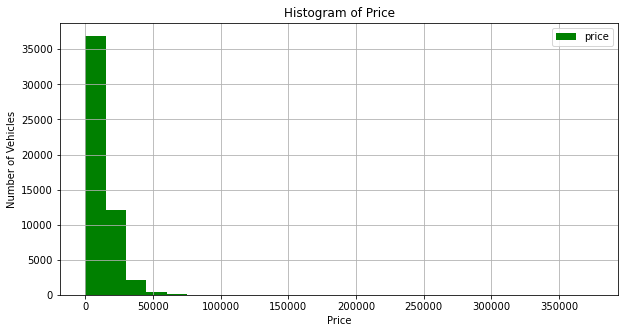

In [53]:
data.plot(y='price',title= 'Histogram of Price', kind= 'hist', color= 'green',grid= True, bins = 25,
         figsize=(10,5))
plt.xlabel('Price')
plt.ylabel('Number of Vehicles')
plt.show()

Let's add a range to check the numbers near the 50,000.

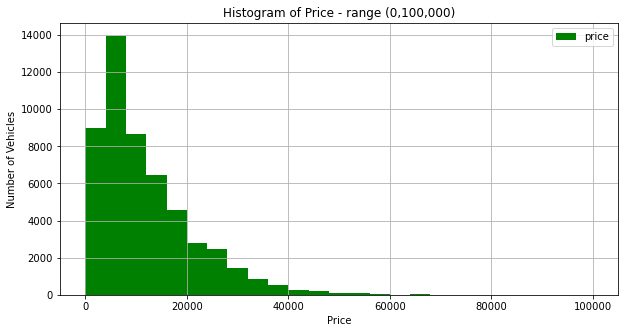

In [54]:
data.plot(y='price',title= 'Histogram of Price - range (0,100,000)', kind= 'hist', color= 'green',grid= True, bins = 25,
         figsize=(10,5), range= (0,100000))
plt.xlabel('Price')
plt.ylabel('Number of Vehicles')
plt.show()

It seems that the bar above 60,000 contains outliers, these values are high and scarce. We will check it later on with the Boxplot graph. 

Now let's check the smaller values.

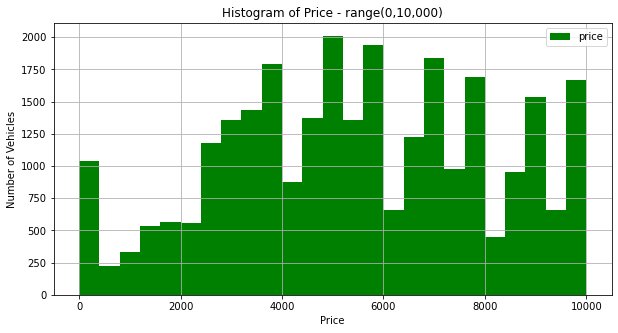

In [55]:
data.plot(y='price',title= 'Histogram of Price - range(0,10,000)', kind= 'hist', color= 'green',grid= True, bins = 25,
         figsize=(10,5), range= (0,10000))
plt.xlabel('Price')
plt.ylabel('Number of Vehicles')
plt.show()

It seems that we have a lot of cars that were sold almost free. For example, we have around 1,000 vehicles that were sold around zero price. So, or our owners are very generous or it's an anomaly that affecting the histogram. From my experience, when its come to money, people tend to be non emotional. Let's look again at the **Histogram of Price - range (0,100,000)**.

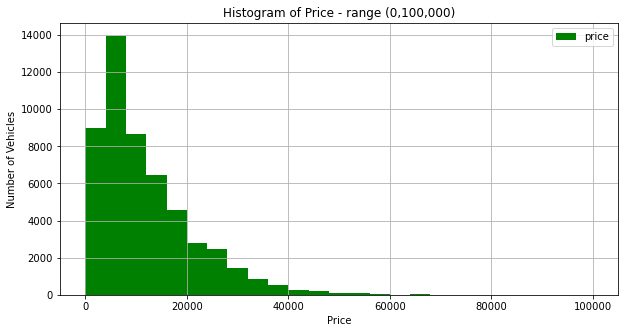

In [56]:
data.plot(y='price',title= 'Histogram of Price - range (0,100,000)', kind= 'hist', color= 'green',grid= True, bins = 25,
         figsize=(10,5), range= (0,100000))
plt.xlabel('Price')
plt.ylabel('Number of Vehicles')
plt.show()

We see here that the histogram looks like a "half" normal distribution. It has a long tail to the right, but no long tail to the left, but a "block". The outliers make it looks like many of the cars were sold cheap, and that some cars were sold at extremely high price. 

Also, we see here a big jump around the 100,000 price. Let's take a closer look. We will set the range to (0,50000) because above we have a histogram for the range of (0,100000) and it's not informative enough. 

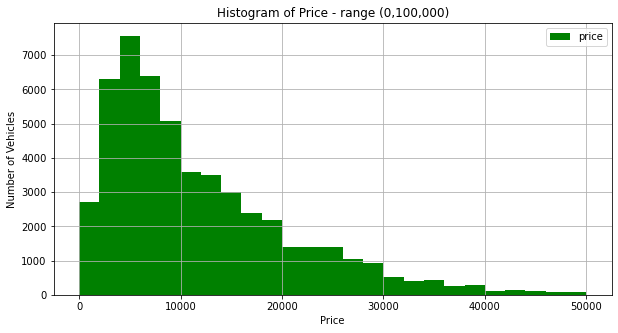

In [57]:
data.plot(y='price',title= 'Histogram of Price - range (0,100,000)', kind= 'hist', color= 'green',grid= True, bins = 25,
         figsize=(10,5), range= (0,50000))
plt.xlabel('Price')
plt.ylabel('Number of Vehicles')
plt.show()

Here we see that many cars were sold yntil the 10,000 sum, so the pick at the histogram above make sense.

**Age**
***

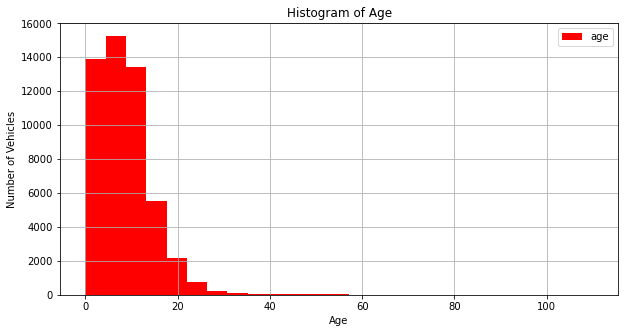

In [58]:
data.plot(y='age',title= 'Histogram of Age', kind= 'hist', color= 'red',grid= True, bins = 25,
         figsize=(10,5))
plt.xlabel('Age')
plt.ylabel('Number of Vehicles')
plt.show()

It seems that there are outliers after the age of 35 (make sense). Let's check it. We will add range to get a closer look. 

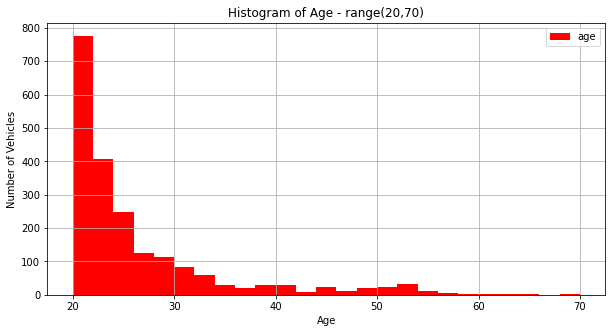

In [59]:
data.plot(y='age',title= 'Histogram of Age - range(20,70)', kind= 'hist', color= 'red',grid= True, bins = 25,
         figsize=(10,5), range= (20,70))
plt.xlabel('Age')
plt.ylabel('Number of Vehicles')
plt.show()

Indeed we see that we have outliers after the age of 35. The number of people that buy a 30+ years ald car is minor. Let's check the values from the left side.

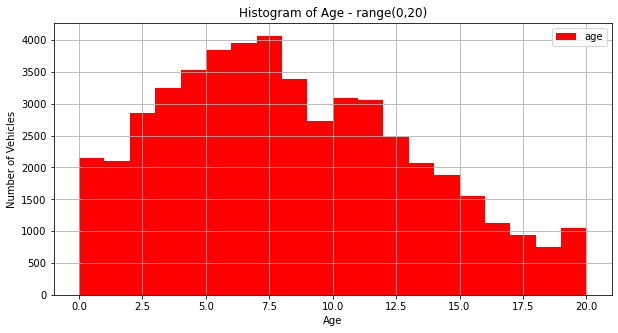

In [60]:
data.plot(y='age',title= 'Histogram of Age - range(0,20)', kind= 'hist', color= 'red',grid= True, bins =20,
         figsize=(10,5), range= (0,20))
plt.xlabel('Age')
plt.ylabel('Number of Vehicles')
plt.show()

We checked the range from zero to 20. We see that most of the ads to sell were of vehicles of the age 5-7.5 years. There are also brand new cars that were published to sell, but from my experience that is also a common case. So for this parameter, there are no outliers from the left, only from the right, with very old cars. Let's take a look again on the whole histogram.

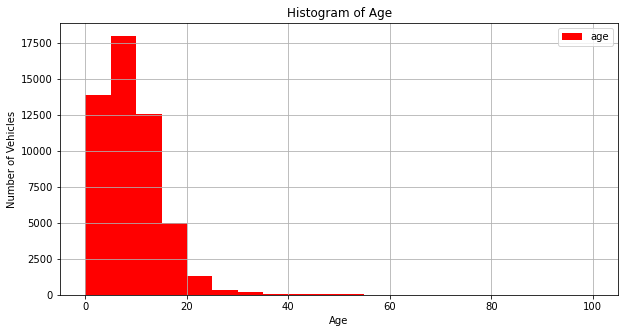

In [61]:
data.plot(y='age',title= 'Histogram of Age', kind= 'hist', color= 'red',grid= True, bins = 20,
         figsize=(10,5), range= (0,100))
plt.xlabel('Age')
plt.ylabel('Number of Vehicles')
plt.show()

The outliers of the **age** parameter, pulling the histogram to the right, which of course impacts the mean of the data. It seems like there are very old cars, above 50 years old,  that people published for sale. That's a very rare occasion, and probably an anomaly. The pick that we see above, is around the ages 5-7.5, which is consistent with the histogram that was ploted earlier. 

**Mileadge**
***

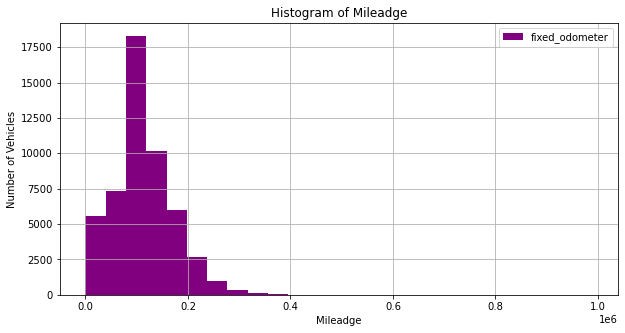

In [62]:
data.plot(y='fixed_odometer',title= 'Histogram of Mileadge', kind= 'hist', color= 'purple',grid= True, bins = 25,
         figsize=(10,5))
plt.xlabel('Mileadge')
plt.ylabel('Number of Vehicles')
plt.show()

We see here that there is some tail to the right. Let's explore it and see if it is an outlier.

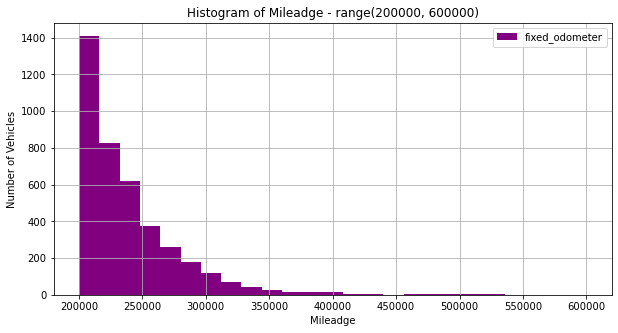

In [63]:
data.plot(y='fixed_odometer',title= 'Histogram of Mileadge - range(200000, 600000)', kind= 'hist', color= 'purple',grid= True, bins = 25,
         figsize=(10,5), range= (200000, 600000))
plt.xlabel('Mileadge')
plt.ylabel('Number of Vehicles')
plt.show()

We see here values higher than 400,000 mileage, which are probably outliers. A car that passed 500,000 mileage is a horse in retirement. 
Let's check the other side of the histogram.

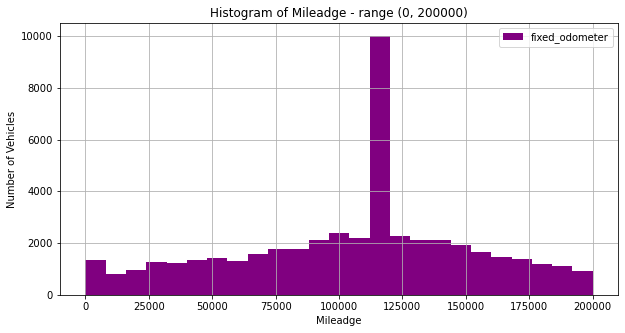

In [64]:
data.plot(y='fixed_odometer',title= 'Histogram of Mileadge - range (0, 200000)', kind= 'hist', color= 'purple',grid= True, bins = 25,
         figsize=(10,5), range= (0, 200000))
plt.xlabel('Mileadge')
plt.ylabel('Number of Vehicles')
plt.show()

O.k, so here we see an extremely high and unusual value from the rest, somewhere near the 120,000 mileage. Let's check it.

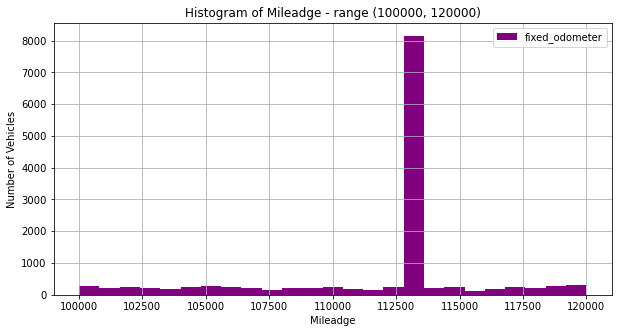

In [65]:
data.plot(y='fixed_odometer',title= 'Histogram of Mileadge - range (100000, 120000)', kind= 'hist', color= 'purple',grid= True,
          bins = 25, figsize=(10,5), range= (100000, 120000))
plt.xlabel('Mileadge')
plt.ylabel('Number of Vehicles')
plt.show()

Let's go deeper. 

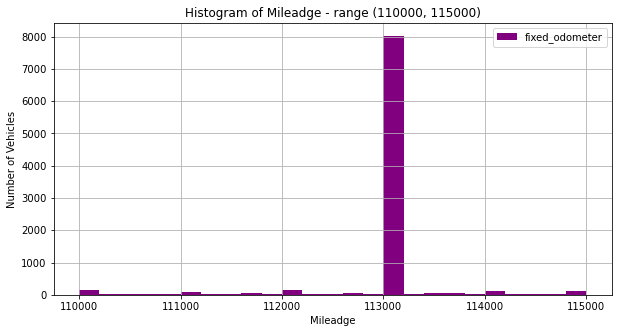

In [66]:
data.plot(y='fixed_odometer',title= 'Histogram of Mileadge - range (110000, 115000)', kind= 'hist', color= 'purple',grid= True,
          bins = 25, figsize=(10,5), range= (110000, 115000))
plt.xlabel('Mileadge')
plt.ylabel('Number of Vehicles')
plt.show()

It seems that mystery a lot of cars were sold at around 113,000. Well, that's not a surprise! Why you ask? 

Let's recall the **odometer** column which represents the vehicle's mileage. The parameter had 15.3% missing values, so we filled them with the median of the variable, which was 113,000.  So, it's no surprise that this value gets so high score.

Let's look again on the main histogram.

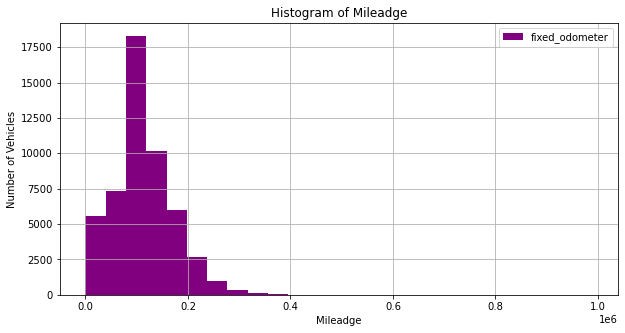

In [67]:
data.plot(y='fixed_odometer',title= 'Histogram of Mileadge', kind= 'hist', color= 'purple',grid= True, bins = 25,
         figsize=(10,5))
plt.xlabel('Mileadge')
plt.ylabel('Number of Vehicles')
plt.show()

In summary, we see that the filled median that we used to replace the missing values, is giving us a pick at its value which is 130,000. Also, the high outliers pull the histogram to the right and create a long tail.  

**Cylinders**
***

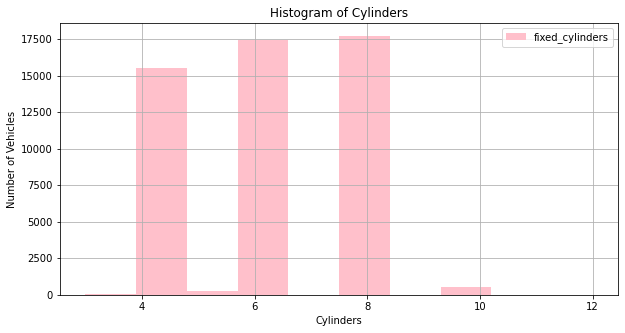

In [68]:
data.plot(y='fixed_cylinders',title= 'Histogram of Cylinders', kind= 'hist', color= 'pink',grid= True, bins = 10,
         figsize=(10,5))
plt.xlabel('Cylinders')
plt.ylabel('Number of Vehicles')
plt.show()

Here we see 5 things:
1. A vehicle with 10 cylinders is very rare (maybe not only at fast and furious movie 😃)
2. For some reason a car with 5 cylinders is very also rare. Maybe it's a mistake.
3. Cars with 7 or 9 cylinders don't exist (in this data at least). 
4. From sections 2+3 above we understand that odd numbers of cylinders aren't the best option for a car. 
5. Cars with less than 4 cylinders are also very rare. 

Let's check it. Let's look at the upper values of the **cylinder** parameter.

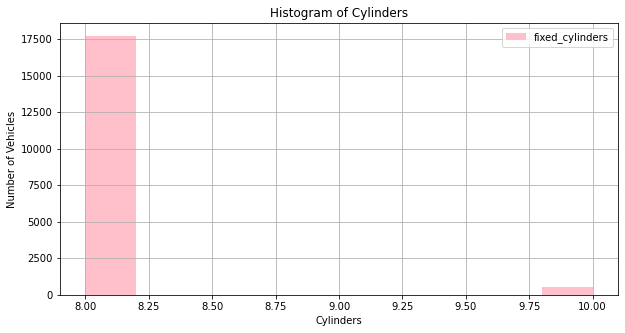

In [69]:
data.plot(y='fixed_cylinders',title= 'Histogram of Cylinders', kind= 'hist', color= 'pink',grid= True, bins = 10,
         figsize=(10,5), range = (8,10))
plt.xlabel('Cylinders')
plt.ylabel('Number of Vehicles')
plt.show()

Here we see that 10 cylinders car is really a very rare car, so rare that maybe it's not real and an outlier. Let's check the other side.

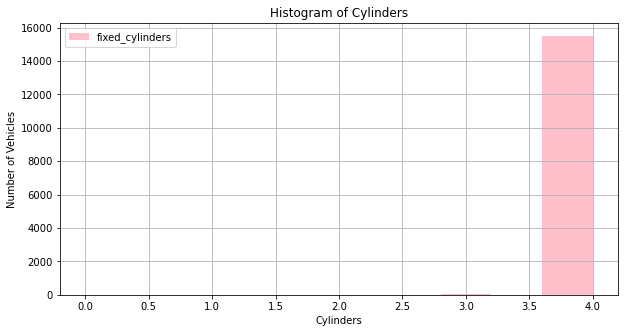

In [70]:
data.plot(y='fixed_cylinders',title= 'Histogram of Cylinders', kind= 'hist', color= 'pink',grid= True, bins = 10,
         figsize=(10,5), range = (0,4))
plt.xlabel('Cylinders')
plt.ylabel('Number of Vehicles')
plt.show()

Cool!

In this histogram, we see that there isn't a car less than with 4 cylinders. There is small amount of cars that has 3 cylinders, but they are probably outliers. 

So, In general, the outliers of the cylinders are pulling the histogram mainly up until the value of 10 cylinders. There is also a small amount of values with 3 cylinders. 

**Condition**
***

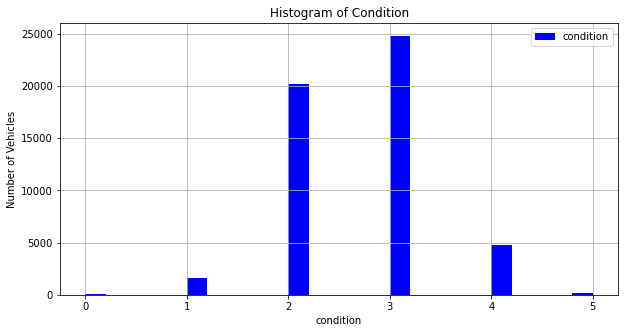

In [71]:
data.plot(y='condition',title= 'Histogram of Condition', kind= 'hist', color= 'blue',grid= True, bins = 25,
         figsize=(10,5))
plt.xlabel('condition')
plt.ylabel('Number of Vehicles')
plt.show()

We see here that there are outliers at condition 5 and condition 0.

**Now let's determine the upper limits of the outliers, remove them and store them in separate DataFrame**
***

In this section we will determine the outliers for this 5 columns:
1. price
2. age
3. odometer
4. cylinders
5. condition

And then remove them and store then in different DataFrame 😎.

**Price**
***

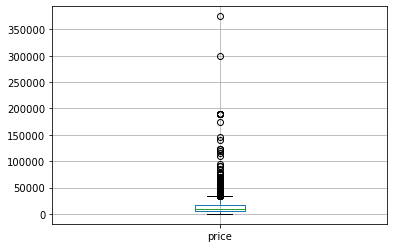

In [72]:
data.boxplot('price')
plt.show()

Let's fix the range of the boxplot.

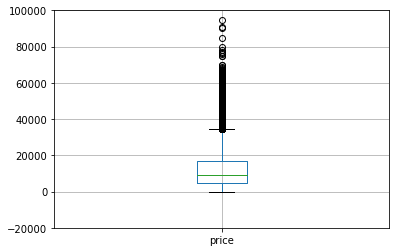

In [73]:
data.boxplot('price')
plt.ylim(-20000, 100000)
plt.show()

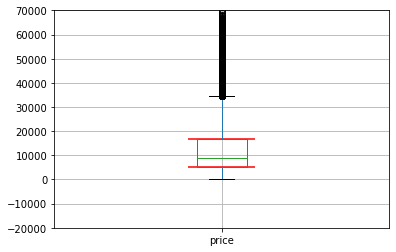

In [74]:
data.boxplot('price')
plt.ylim(-20000, 70000)
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
plt.hlines(y=[Q1,Q3], xmin = 0.9, xmax = 1.1, color = 'red')
plt.show()

Here we see that all the values that are above 35,000 are outliers. 

**Age**
***

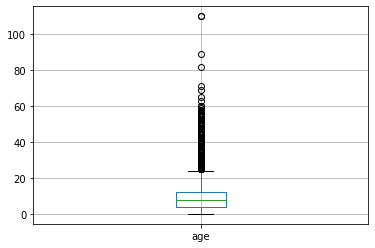

In [75]:
data.boxplot('age')
plt.show()

Let's fix the range of the boxplot.

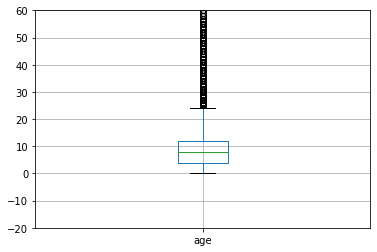

In [76]:
data.boxplot('age')
plt.ylim(-20, 60)
plt.show()

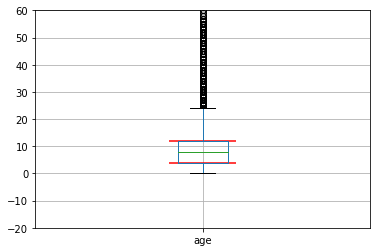

In [77]:
data.boxplot('age')
plt.ylim(-20, 60)
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
plt.hlines(y=[Q1,Q3], xmin = 0.9, xmax = 1.1, color = 'red')
plt.show()

Here we see that every value that is above 25 is an outlier. 

**Mileage**
***

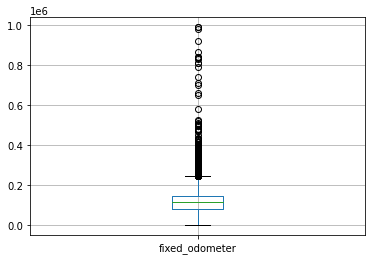

In [78]:
data.boxplot('fixed_odometer')
plt.show()

Let's fix the range of the boxplot.

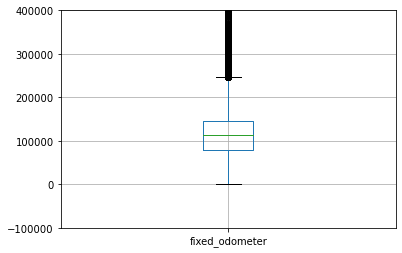

In [79]:
data.boxplot('fixed_odometer')
plt.ylim(-100000, 400000)
plt.show()

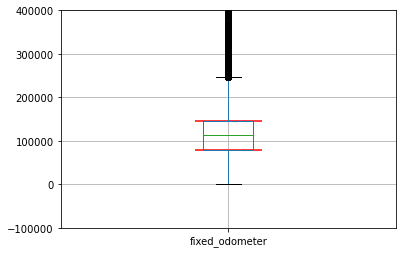

In [80]:
data.boxplot('fixed_odometer')
plt.ylim(-100000, 400000)
Q1 = data['fixed_odometer'].quantile(0.25)
Q3 = data['fixed_odometer'].quantile(0.75)
plt.hlines(y=[Q1,Q3], xmin = 0.9, xmax = 1.1, color = 'red')
plt.show()

Here we see that all the values that above 250,000 are outliers. 

**Cylinders**
***

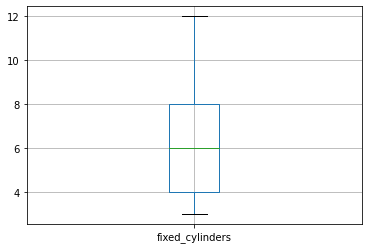

In [81]:
data.boxplot('fixed_cylinders')
plt.show()

Let's set the range of the boxplot.

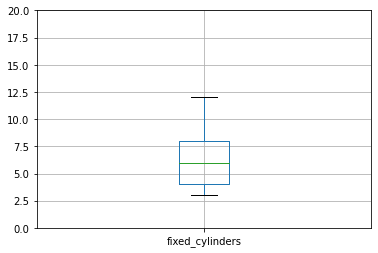

In [82]:
data.boxplot('fixed_cylinders')
plt.ylim(0, 20)
plt.show()

Here we don't see the outliers that we found in the histogram. So we will remove the outliers that we found in the histogram:
1. All the rows beneath 4 cylinders.
2. All the rows above 8 cylinders.
3. All the rows with 5 cylinders. 

Great! 

**Condition**
***

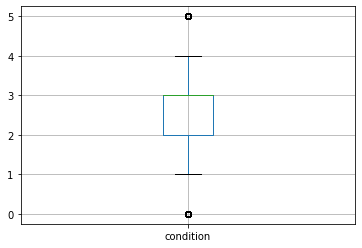

In [83]:
data.boxplot('condition')
plt.show()

Let's set the range of the boxplot.

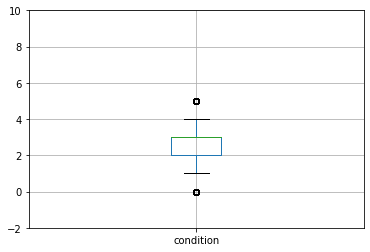

In [84]:
data.boxplot('condition')
plt.ylim(-2, 10)
plt.show()

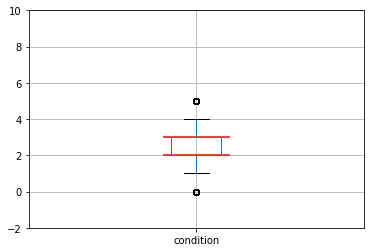

In [85]:
data.boxplot('condition')
plt.ylim(-2, 10)
Q1 = data['condition'].quantile(0.25)
Q3 = data['condition'].quantile(0.75)
plt.hlines(y=[Q1,Q3], xmin = 0.9, xmax = 1.1, color = 'red')
plt.show()

Here we see that all the values that above 4 and beneath 1 are outliers. This is consistent with what we found in the histogram.  

Now lets remove all the outliers and set them in a different DataFrame.

In [86]:
bed_data_price = data.query('price>35000')
bed_data_age = data.query('age>25')
bed_data_mileage = data.query('fixed_odometer>250000')
bed_data_cylinders = data.query('fixed_cylinders<4 or fixed_cylinders==5 or fixed_cylinders>8')
bed_data_condition = data.query('condition <1 or condition>4')
frames = [bed_data_price,bed_data_age, bed_data_mileage,bed_data_cylinders,bed_data_condition]
bed_data = pd.concat(frames)

In [87]:
data_clean = data.drop(data[data['price']>35000].index)
data_clean2 =data_clean.drop(data_clean[data_clean['age']>25].index)
data_clean3 = data_clean2.drop(data_clean2[data_clean2['fixed_odometer']>250000].index)
data_clean4 = data_clean3.drop(data_clean3[(data_clean3['fixed_cylinders']<4) | (data_clean3['fixed_cylinders']==5) | (data_clean3['fixed_cylinders']>8)].index)
data_clean5 = data_clean4.drop(data_clean4[(data_clean4['condition']<1) | (data_clean4['condition']>4) ].index)
print(data_clean5['price'].max())
print(data_clean5['age'].max())
print(data_clean5['fixed_odometer'].max())
print(data_clean5['fixed_cylinders'].unique())
print(data_clean5['condition'].unique())

35000
25
250000
[6 4 8]
[2 4 1 3]


**Comparing old and new histograms**
***

**Price**

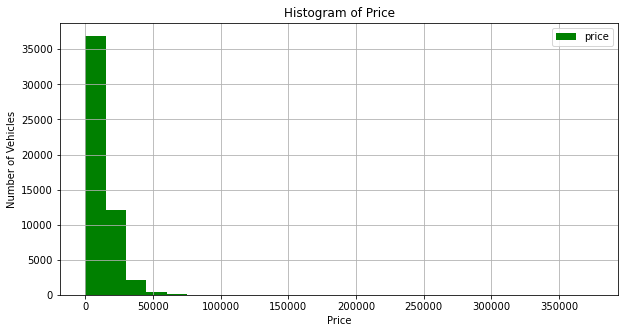

In [88]:
data.plot(y='price',title= 'Histogram of Price', kind= 'hist', color= 'green',grid= True, bins = 25,
         figsize=(10,5))
plt.xlabel('Price')
plt.ylabel('Number of Vehicles')
plt.show()

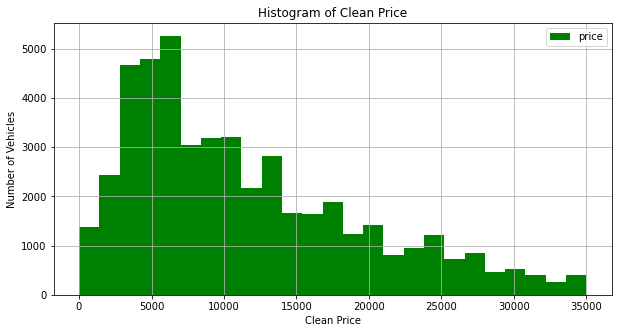

In [89]:
data_clean5.plot(y='price',title= 'Histogram of Clean Price', kind= 'hist', color= 'green',grid= True, bins = 25,
         figsize=(10,5))
plt.xlabel('Clean Price')
plt.ylabel('Number of Vehicles')
plt.show()

Here we see more "normal" distribution, without strange tails and picks. Looks great!

**Age**

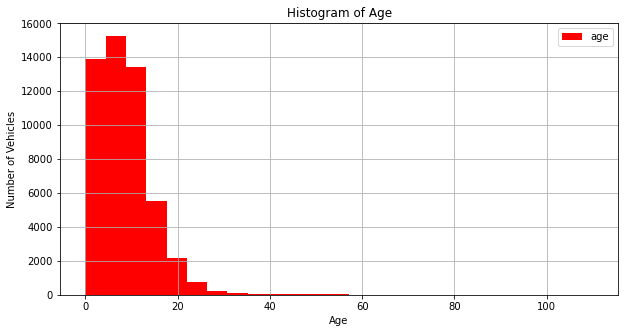

In [90]:
data.plot(y='age',title= 'Histogram of Age', kind= 'hist', color= 'red',grid= True, bins = 25,
         figsize=(10,5))
plt.xlabel('Age')
plt.ylabel('Number of Vehicles')
plt.show()

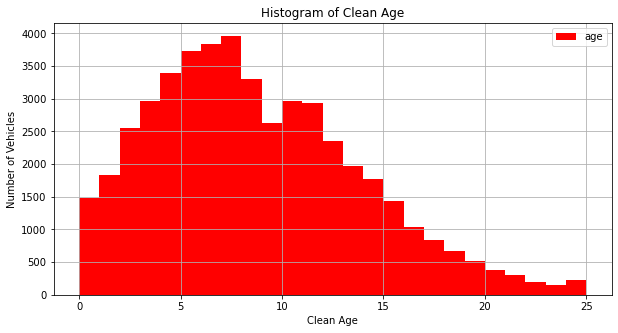

In [91]:
data_clean5.plot(y='age',title= 'Histogram of Clean Age', kind= 'hist', color= 'red',grid= True, bins = 25,
         figsize=(10,5))
plt.xlabel('Clean Age')
plt.ylabel('Number of Vehicles')
plt.show()

This histogram seems much better than the first with the outlier. It has an almost perfect normal distribution. What a difference. 

**Mileage**

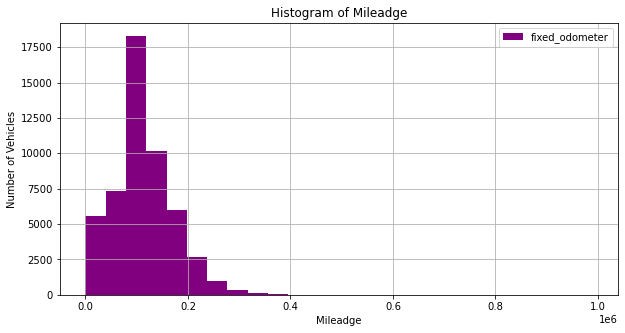

In [92]:
data.plot(y='fixed_odometer',title= 'Histogram of Mileadge', kind= 'hist', color= 'purple',grid= True, bins = 25,
         figsize=(10,5))
plt.xlabel('Mileadge')
plt.ylabel('Number of Vehicles')
plt.show()

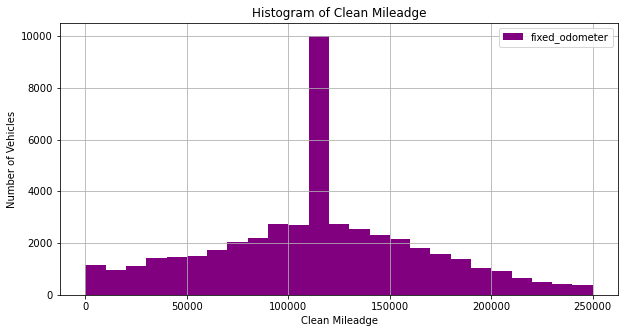

In [93]:
data_clean5.plot(y='fixed_odometer',title= 'Histogram of Clean Mileadge', kind= 'hist', color= 'purple',grid= True, bins = 25,
         figsize=(10,5))
plt.xlabel('Clean Mileadge')
plt.ylabel('Number of Vehicles')
plt.show()

Very normal distribution compared to the first. The peak is normal because as we said it is the median we used to fill in the missing values.

**Cylinders**

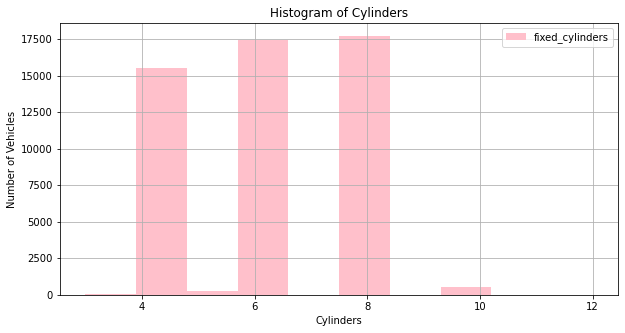

In [94]:
data.plot(y='fixed_cylinders',title= 'Histogram of Cylinders', kind= 'hist', color= 'pink',grid= True, bins = 10,
         figsize=(10,5))
plt.xlabel('Cylinders')
plt.ylabel('Number of Vehicles')
plt.show()

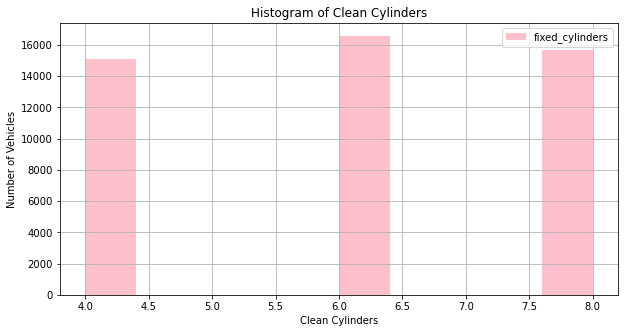

In [95]:
data_clean5.plot(y='fixed_cylinders',title= 'Histogram of Clean Cylinders', kind= 'hist', color= 'pink',grid= True, bins = 10,
         figsize=(10,5))
plt.xlabel('Clean Cylinders')
plt.ylabel('Number of Vehicles')
plt.show()

Seems much better. like skyscrapers in big cities😎.

**Condition**

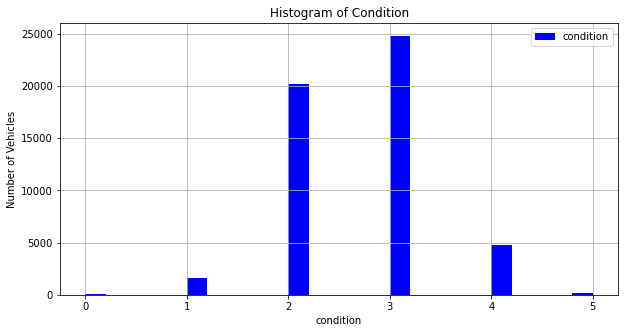

In [96]:
data.plot(y='condition',title= 'Histogram of Condition', kind= 'hist', color= 'blue',grid= True, bins = 25,
         figsize=(10,5))
plt.xlabel('condition')
plt.ylabel('Number of Vehicles')
plt.show()

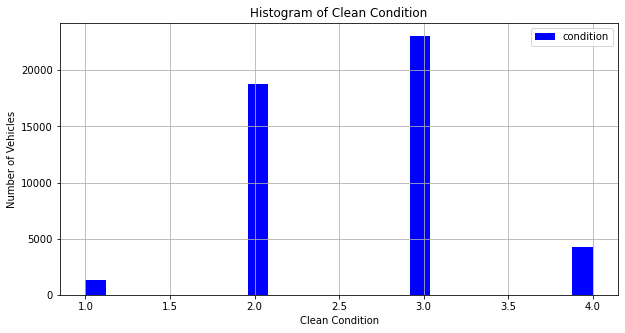

In [97]:
data_clean5.plot(y='condition',title= 'Histogram of Clean Condition', kind= 'hist', color= 'blue',grid= True, bins = 25,
         figsize=(10,5))
plt.xlabel('Clean Condition')
plt.ylabel('Number of Vehicles')
plt.show()

Looking good! Without very small and strange values.💪

**How many days advertisements were displayed**

Let's plot a histogram.

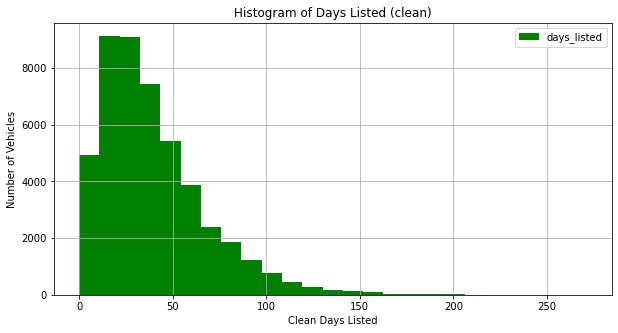

In [98]:
data_clean5.plot(y='days_listed',title= 'Histogram of Days Listed (clean)', kind= 'hist', color= 'green',grid= True, bins = 25,
         figsize=(10,5))
plt.xlabel('Clean Days Listed')
plt.ylabel('Number of Vehicles')
plt.show()

Now we will calculate the mean and the median.

In [99]:
print('This is the mean of days_listed:',data_clean5['days_listed'].mean())
print('This is the median of days_listed:',data_clean5['days_listed'].median())
data_clean5['days_listed'].describe()

This is the mean of days_listed: 39.530535638970896
This is the median of days_listed: 33.0


count    47420.000000
mean        39.530536
std         28.198706
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

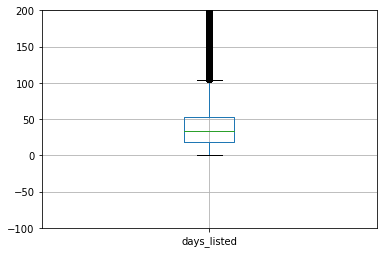

In [100]:
data_clean5.boxplot('days_listed')
plt.ylim(-100, 200)
plt.show()

We will take the value of the median because it is safer with it comes to numbers(even though we cleaned the data) and determine when ads were removed quickly and when they were listed abnormal amount of time. 

We found that the median for the time that ads were listed is 33 days. Also, we see that the outliers for **days_listed** is above 100 days, and from the described method we can tell that 25% percent of the ads were removed after up to 19 days.

So, combining all this we can say that the typical lifetime of an ad is 33 days, and an ad that was listed above 100 days was an abnormally long time on the site, and ads that were removed after 15 days were removed quickly.😎

**Number of ads and  average price  for each type of vehicle**

*Average price*

In [101]:
avr_price_model = data_clean5.pivot_table(index = 'type', values = 'price')
avr_price_model.head()

,price
type,
SUV,10599.051998
bus,11145.500000
convertible,12913.484330
coupe,13939.264646
hatchback,6876.696177


*Number of ads*

In [102]:
num_ads_model = data_clean5.pivot_table(index = 'type', values='fixed_cylinders', aggfunc= 'count')
num_ads_model.columns = ['num_ads']
num_ads_model.head()

,num_ads
type,
SUV,11789
bus,10
convertible,351
coupe,1980
hatchback,994


Let's plot a graph showing the dependence of the number of ads on the vehicle type.

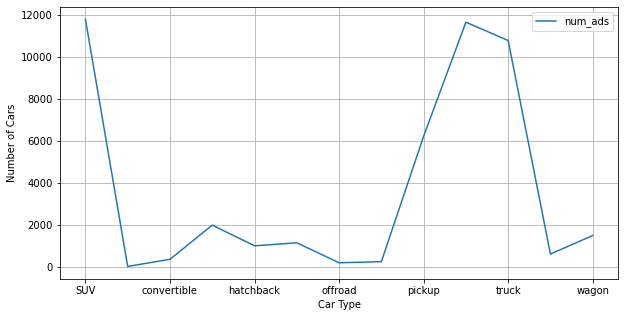

In [103]:
num_ads_model.plot(grid=True, figsize = (10,5))
plt.ylabel('Number of Cars')
plt.xlabel('Car Type')
plt.show()

In [104]:
num_ads_model.sort_values(by='num_ads', ascending = False).head(5)

,num_ads
type,
SUV,11789
sedan,11654
truck,10780
pickup,6216
coupe,1980


The 2 types with the greatest amount ads are:
1. SUV
2. sedan

**What factors impact the price most?**

**SUV**

In [105]:
suv = data_clean5.query('type == "SUV"')
suv.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,fixed_cylinders,fixed_odometer,fixed_color,fixed_4wd,fixed_date,day_posted,month_posted,year_posted,age,avr_mileage
0,9400,2011.0,bmw x5,2,6.0,gas,145000.0,automatic,SUV,NaN,...,6,145000,undefined,1,2018-06-23,Saturday,June,2018,7,20714.285714
7,15990,2013.0,honda pilot,3,6.0,gas,109473.0,automatic,SUV,black,...,6,109473,black,1,2019-01-07,Monday,January,2019,6,18245.500000
8,11500,2012.0,kia sorento,3,4.0,gas,104174.0,automatic,SUV,NaN,...,4,104174,undefined,1,2018-07-16,Monday,July,2018,6,17362.333333
9,9200,2008.0,honda pilot,3,NaN,gas,147191.0,automatic,SUV,blue,...,6,147191,blue,1,2019-02-15,Friday,February,2019,11,13381.000000
14,12990,2009.0,gmc yukon,3,8.0,gas,132285.0,automatic,SUV,black,...,8,132285,black,1,2019-01-31,Thursday,January,2019,10,13228.500000


*Price-Age*

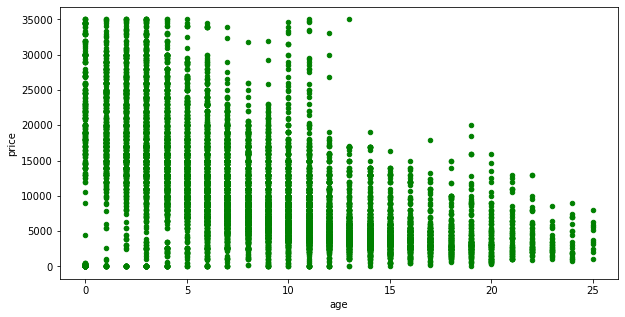

In [106]:
suv.plot(x='age', y='price', kind = 'scatter', figsize= (10,5), color = 'green')
plt.show()

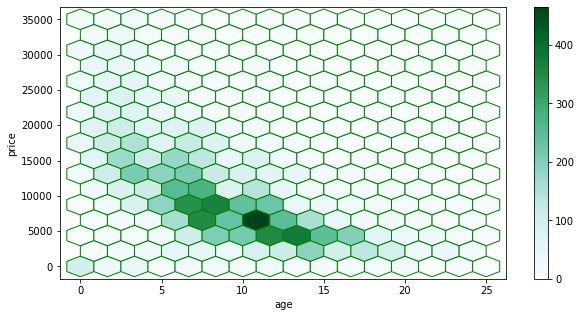

In [107]:
suv.plot(x='age', y='price', kind = 'hexbin', figsize= (10,5), color = 'green', sharex = False, gridsize = 15)
plt.show()

In [108]:
suv['age'].corr(suv['price'])

-0.5870170253199336

We see that is a correlation, but it could be stronger. If the age of the car is higher, the price will be lower and vice versa. 

*Price-Mileage*

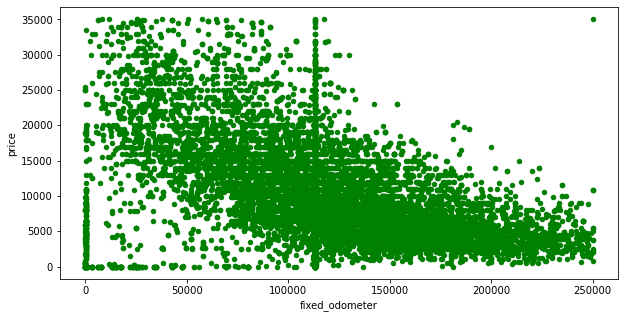

In [109]:
suv.plot(x='fixed_odometer', y='price', kind = 'scatter', figsize= (10,5), color = 'green')
plt.show()

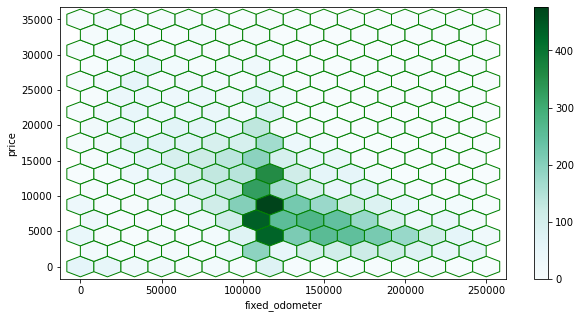

In [110]:
suv.plot(x='fixed_odometer', y='price', kind = 'hexbin', figsize= (10,5), color = 'green', sharex = False, gridsize = 15)
plt.show()

In [111]:
suv['fixed_odometer'].corr(suv['price'])

-0.4875696526349298

Here also, we see that is a correlation, but it could be stronger. If the mileage of the car is higher, the price will be lower and vice versa. 

*Price-Condition*

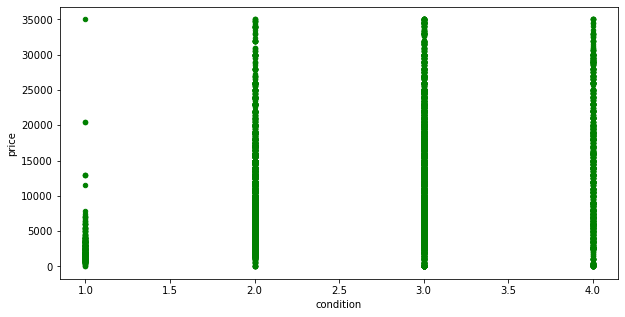

In [112]:
suv.plot(x='condition', y='price', kind = 'scatter', figsize= (10,5), color = 'green')
plt.show()

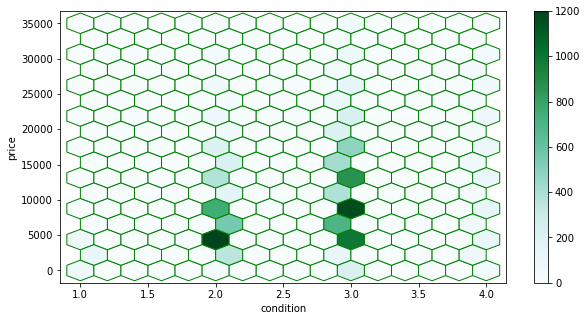

In [113]:
suv.plot(x='condition', y='price', kind = 'hexbin', figsize= (10,5), color = 'green', sharex = False, gridsize = 15)
plt.show()

In [114]:
suv['condition'].corr(suv['price'])

0.2605876102349908

A Pearson correlation coefficient of 0.26 is very weak. There is some connection but the influence is very small. The influence of the condition on the price of the car is limited. 

*Price-Transsmision*

Due to the fact that the **transmission** variable is categorical, we will check if its categories have at least 50 ads because otherwise, we cannot use them for our analysis.  

In [115]:
suv.pivot_table(index = 'transmission', values = 'model', aggfunc = 'count').sort_values(by = 'model')

,model
transmission,
other,95
manual,464
automatic,11230


All good! Let's continue. 🤩

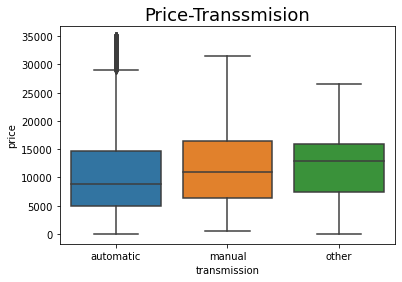

In [116]:
sns.boxplot(x='transmission', y="price", data=suv)
plt.title("Price-Transsmision", size=18)
plt.show()

There is a connection between the transmission type and the price, but it could be greater. We see here that the median of the automatic transmission is around 8,000 while the other transmission is around 14,000. The median of the manual transmission is around 13,000. So, there is a difference between the automatic and the other transmission, but between the manual and the other transmission, there isn't a significant difference. We can understand from this that, the number of cars with automatic transmission is big so it's not a problem to find one, and Manuel and other (for example semi-automatic) is hard to find so the price is higher. We can also tell that people use cars with automatic transmission much more than other transmission types.   

*Price-Color*

Due to the fact that the **fixed_color** variable is categorical, we will check if its categories have at least 50 ads because otherwise, we cannot use them for our analysis.

In [117]:
suv.pivot_table(index = 'fixed_color', values = 'model', aggfunc = 'count').sort_values(by = 'model')

,model
fixed_color,
purple,37
yellow,45
orange,81
custom,287
brown,353
green,409
red,867
blue,1002
grey,1140


Let's remove the purple and the yellow colors from the data. 

In [118]:
suv_clean = suv.query('fixed_color != "purple" and fixed_color != "yellow"')
suv_clean['fixed_color'].value_counts()

undefined    2120
black        2071
white        1854
silver       1523
grey         1140
blue         1002
red           867
green         409
brown         353
custom        287
orange         81
Name: fixed_color, dtype: int64

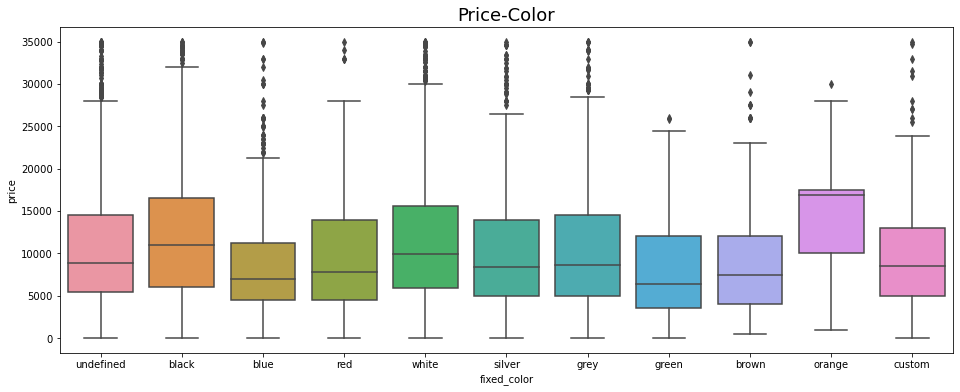

In [119]:
plt.figure(figsize=(16,6))
sns.boxplot(x='fixed_color', y="price", data=suv_clean)
plt.title("Price-Color", size=18)
plt.show()

It seems that there is a difference between the prices depending on the color. For instance, an orange vehicle is more expensive than a blue car. The median of an orange car is around 17,000 while the median of a blue car is around 7,000 - twice less!
If we will take a close look we will see that the colors blue, red, white, silver, grey, green, custom, and brown had roughly the same median. It's quite reasonable because these are the common and 'unspecial' colors (the custom are probably specific colors shades of the regular colors like "pearl white" because its boxplot is very similar to the regular colors).
So, we can say that color affects the price, but not always. It affects only if it's an unusual color like orange, but between silver and gray the color has almost zero effect on the price. People that want to buy an orange car, are probably willing to pay more, due to the fact that most people don't have an orange car so it's rare to find one (and here the rules of supply and demand are coming to place). 

**Sedan**

In [120]:
sedan = data_clean5.query('type == "sedan"')
sedan.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,fixed_cylinders,fixed_odometer,fixed_color,fixed_4wd,fixed_date,day_posted,month_posted,year_posted,age,avr_mileage
2,5500,2013.0,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,...,4,110000,red,0,2019-02-07,Thursday,February,2019,6,18333.333333
4,14900,2017.0,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,...,4,80903,black,0,2019-04-02,Tuesday,April,2019,2,40451.500000
5,14990,2014.0,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,...,6,57954,black,1,2018-06-20,Wednesday,June,2018,4,14488.500000
6,12990,2015.0,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,...,4,79212,white,0,2018-12-27,Thursday,December,2018,3,26404.000000
11,8990,2012.0,honda accord,3,4.0,gas,111142.0,automatic,sedan,grey,...,4,111142,grey,0,2019-03-28,Thursday,March,2019,7,15877.428571


What factors impact the price most? Take each of the popular types you detected at the previous stage and study whether the price depends on age, mileage, condition, transmission type, and color. For categorical variables (transmission type and color), plot box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.

*Price-Age*

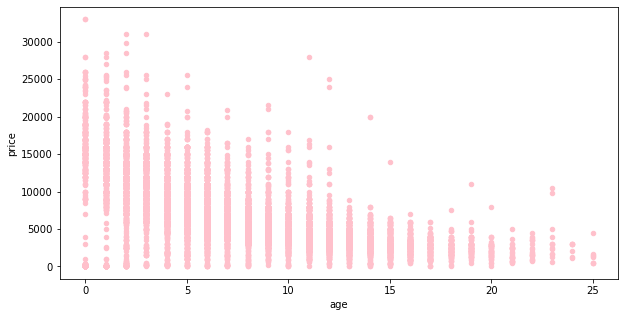

In [121]:
sedan.plot(x='age', y='price', kind = 'scatter', figsize= (10,5), color = 'pink')
plt.show()

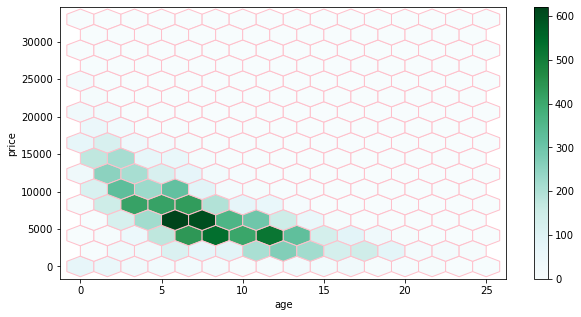

In [122]:
sedan.plot(x='age', y='price', kind = 'hexbin', figsize= (10,5), color = 'pink', sharex = False, gridsize = 15)
plt.show()

In [123]:
sedan['age'].corr(sedan['price'])

-0.6305928707018317

We see that the Pearson correlation coefficient value in the sedan is similar to the one of suv, but a little bit stronger. There is a correlation, but it could be greater. If the age of the car is higher, the price will be lower and vice versa (even more than in suv types).

*Price-Mileage*

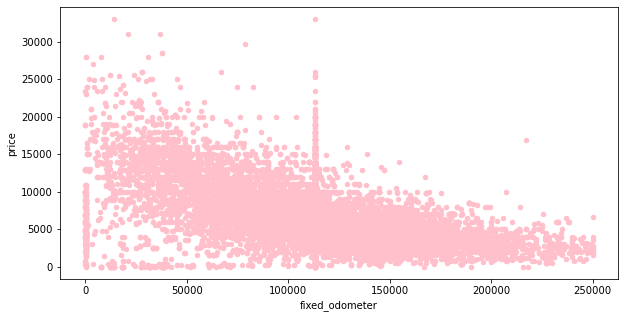

In [124]:
sedan.plot(x='fixed_odometer', y='price', kind = 'scatter', figsize= (10,5), color = 'pink')
plt.show()

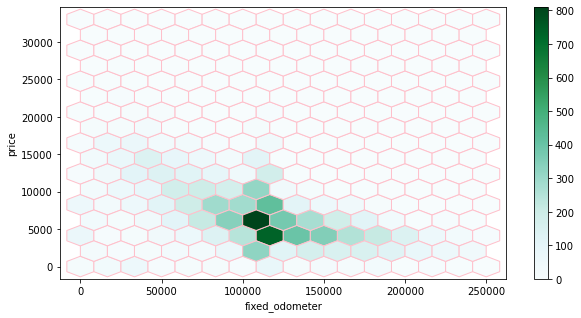

In [125]:
sedan.plot(x='fixed_odometer', y='price', kind = 'hexbin', figsize= (10,5), color = 'pink', sharex = False, gridsize = 15)
plt.show()

In [126]:
sedan['fixed_odometer'].corr(sedan['price'])

-0.520314907009603

Here also we see that the Pearson correlation coefficient value in the sedan is similar to the one of suv, but a little bit stronger. There is a correlation, but it could be greater. If the mileage of the car is higher, the price will be lower and vice versa (here also, even more than in suv).

*Price-Condition*

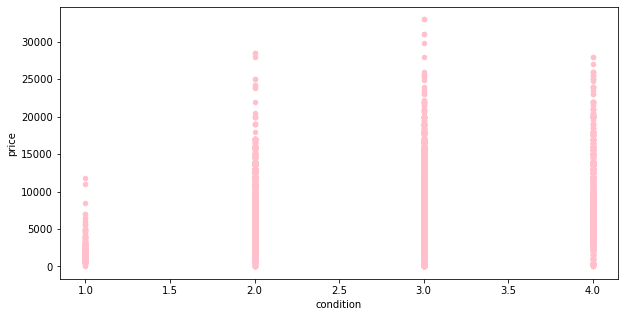

In [127]:
sedan.plot(x='condition', y='price', kind = 'scatter', figsize= (10,5), color = 'pink')
plt.show()

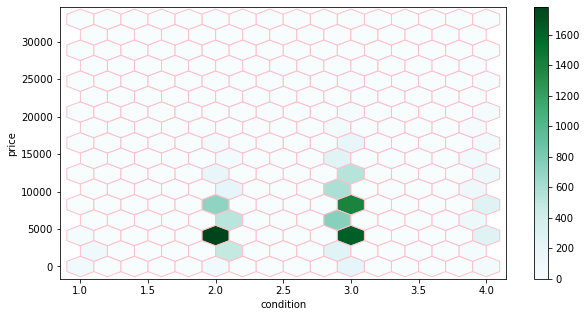

In [128]:
sedan.plot(x='condition', y='price', kind = 'hexbin', figsize= (10,5), color = 'pink', sharex = False, gridsize = 15)
plt.show()

In [129]:
sedan['condition'].corr(sedan['price'])

0.2921564545009851

Again we see that Pearson correlation coefficient velue in sedan is simmilar to suv. A value of 0.29 is very weak. There is some connection but the influence is very small. The influence of the condition on the price of the car is limited (as we saw in the suv) 

*Price-Transsmision*

Due to the fact that the **transmission** variable is categorical, we will check if its categories have at least 50 ads because otherwise, we cannot use them for our analysis.  

In [130]:
sedan.pivot_table(index = 'transmission', values = 'model', aggfunc = 'count').sort_values(by = 'model')

,model
transmission,
other,74
manual,553
automatic,11027


Looking good! Let's continue. 🤩

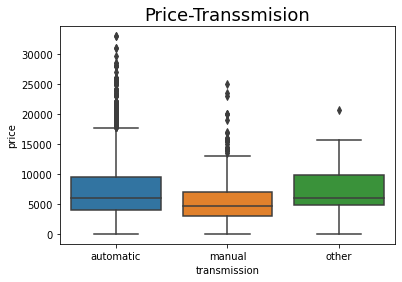

In [131]:
sns.boxplot(x='transmission', y="price", data=sedan)
plt.title("Price-Transsmision", size=18)
plt.show()

There is some connection between the transmission type and the price, but it could be stronger. The median price for a car with automatic transmission is around 6,000, while the median price for a car with manual transmission is around 4,000, and the median price for a car with other transmission is about 6,000. So there isn't much difference between the types. The main difference is between the manual type and the other 2, while between the automatic and other types there isn't a difference. 

So we can say that for cars of the sedan type, the influence of a transmission type is minor and insignificant (in contrast to the suv, where there was a bigger difference between the types). 

*Price-Color*

Due to the fact that the transmission variable is categorical, we will check if its categories have at least 50 ads because otherwise, we cannot use them for our analysis.

In [132]:
sedan.pivot_table(index = 'fixed_color', values = 'model', aggfunc = 'count').sort_values(by = 'model')

,model
fixed_color,
orange,9
yellow,21
purple,23
green,197
brown,249
custom,268
red,902
blue,1192
white,1435


Let's remove the orange, yellow and purple colors from the data. 

In [133]:
sedan_clean = sedan.query('fixed_color != "purple" and fixed_color != "yellow" and fixed_color != "orange"')
sedan_clean['fixed_color'].value_counts()

undefined    2104
silver       1986
black        1709
grey         1559
white        1435
blue         1192
red           902
custom        268
brown         249
green         197
Name: fixed_color, dtype: int64

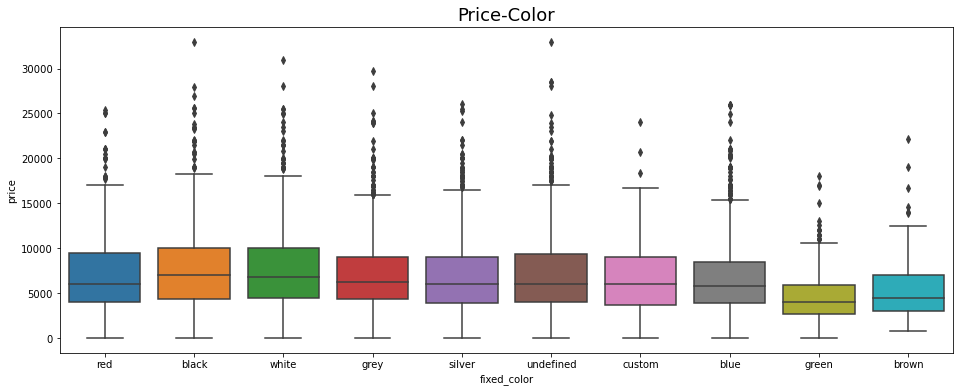

In [134]:
plt.figure(figsize=(16,6))
sns.boxplot(x='fixed_color', y="price", data=sedan_clean)
plt.title("Price-Color", size=18)
plt.show()

We can see from the box plot that in general, most of the colors have the same median price. Only the colors red, green and brown is a little bit lower than the rest. So, we can say that for sedan vehicles, the color doesn't affect much on the price. The median price for all the colors of sedan vehicles is roughly the same.  

## Overall conclusion

So, let's remember what we did in this project. 
1. First we opened the file and explored him. 

2. Then we found 5 variables with missing values:

* **model_year**
* **cylinders**
* **odometer**
* **paint_color**
* **is_4wd**

Each of those variables had a different percentage of missing values, which led us to different treatment approaches for each one.

**model year** - Had 7% of missing values. Because it is an important variable for our analysis, we filled the missing values with the medians of every vehicle model. To do so we created a new column with the name fixed_model_year and used the transform() method.

**cylinders** - Had 10% of missing values. Similar to the model_year variable, due to the importance of the variable for our analysis, we filled the missing values with the medians of every vehicle model. To do so we created a new column with the name fixed_cylinders and used the transform() method.

**odometer** - Had 15.3% of missing values. Due to the fact that in most cases the mileage depends on the owner, information that we don't have in this dataset, it is almost impossible to restore it. So we filled the missing values with the median of the column. To do so we created a new column with the name fixed_odometer and used the fillna() method.

**paint_color** - Had 17.99%. It is almost impossible to restore the color of the vehicle, so we filled the missing values in this column with 'undefined' value. To do so we created a new column with the name fixed_color and used the fillna() method.

**is_4wd** - Had 50% of missing values. We know from the description that this is a boolean variable, and we saw that the column contains only the value 1 that represents the value True. This means that the missing values are probably False, so we filled them with the value 0 (that represents the value False). To do so we created a new column with the name fixed_4wd and used the fillna() method.

3. we changed the type of these 4 variables to integer:

fixed_year
fixed_cylinders
fixed_odometer
fixed_4wd

We changed their types to an integer because the values that they represent are whole numbers in the real world and not decimals. So now they faithfully represent the reality out there.

4. We added sum additioonal data to the table. 

* At first we calculated the day, month, and year of the ads on the day that they were posted. To do so we used the DatetimeIndex() method and created 3 new columns:
1. **day_posted**
2. **month_posted**
3. **year_posted**


* Afterwards, we used the new **year_poted** column that we created and the column **fixed_model_year** to calculate the age of the vehicles. Here we also created a new column with the name **age**. 


* Then we build a function to calculate the vehicle's average mileage per year. We used a function because we needed to take care of several cases, for example when the age is 0 (and you cannot divide by 0!). Then we used the apply() method and applied it to our data. Here also, we created a new column with the name **avr_mileage**.


* In the last step we changed the string values in the **condition** column to numeric scale using a dictionary and the replace() method:
1. new - 5
2. like new - 4
3. excellent - 3
4. good - 2
5. fair - 1
6. salvage - 0


5. We carried out exploratory data analysis. We ploted histogram to these 5 parameters:
* price
* age
* fixed_odometer (mileage)
* fixed_cylinders 
* condition

We noticed that every parameter had outliers because the histogram was not in the right form, so we went and plotted a box-plot to each variable to set where are the outliers. We found that:
* For **price**, every value that is above 35,000 is an outlier. 
* For **age**, every value that is above 25 is an outlier. 
* For **fixed_odometer** (mileage), every value that is above 250,000 is an outlier. 
* For **fixed_cylinders**, every value that isn't equal to 4,6,8 is an outlier.  


Then, we removed all the outliers and saved them in a separate DataFrame, so we left with filtered data without outliers. 

In the next stage, we took the filtered data and plotted new histograms for the same variables above to compare them and see how the distribution form changed. The histograms with the filtered data were much better and had a form of normal distribution. It's important to notice that in the fixed_odometer (mileage) parameter. in both of the histograms, we had a peak around the value of 113,000. It's not surprising because it's the value of the median which we used to fill the missing values of the odometer column. 

Afterward, we found the mean and the median of the number of days that the ads were listed. The results were:
* Mean - 39
* Median - 33

We also plotted a box-plot to see the outliers and used the describe method on the **days_listed** parameter to get a better understanding of the lifetime of an ad. The box-plot showed us that an ad that was listed above 100 days (meaningly 3+ months) is an outlier. From the describe() method, we saw that 25% percent of the ads were removed after up to 19 days. 

So, we took the median as our reference point because it is safer with it comes to numbers(even though we cleaned the data), and determined the following:
1. The typical lifetime of an ad is 33 days.
2. An ad that was listed above 100 days was an abnormally long time on the site.
3. Ads that were removed after 15 days (we took a smaller number than 19) were removed quickly. 

In the next stage, we found the average price for each type of vehicle and also the number of ads per vehicle. We discovered that the 2 types that had the greatest number of ads were:
1. SUV
2. sedan

Following the previous stage, we went to check for these 2 popular types what influences the price the most among 5 variables:
1. age
2. mileage (fixed_odometer)
3. condition
4. transmission
5. color (fixed_color)

For the numeric variables (age, mileage, and condition) we used the scatterplot and the hexibin plots, and also the corr() method to check the Pearson correlation coefficient value. For the categorical parameters (transmission and color) we used the box-plot, and we also checked if each category has at least 50 ads, otherwise, it won't be valid for our analysis. We found the in the color variable there were some colors that had less than 50 ads:
1. SUV - yellow and purple
2. sedan - yellow, purple, and orange
We removed those colors from the data frame for our analysis. 

So after doing all these we found the following:

**SUV + sedan**

We found that for both of the types, the age, the mileage, and the condition had the same effect on the price. 
* age - We found that there is a connection but it could be stronger. If the age of the car is higher, the price will be lower, and vice versa. 
* mileage - Similar to the previous parameter, we found that there is a connection but it could be stronger. If the mileage of the car is higher, the price will be lower, and vice versa.
* condition - There is some connection but it's week. We see an influence only if the condition of the car is excellent.

**transmission**

For this parameter, we saw a difference for the 2 types.
* SUV - There is a difference between the automatic transmission to the manual and other transmissions. Between the manual and the other transmission, there isn't much difference. So we can say if an SUV has an automatic transmission the price will be lower than a SUV with a manual or other transmissions. But a SUV with manual transmission or other transmissions will cost almost the same. 
* sedan - There is a difference between the manual transmission to the automatic and other transmissions. Between the automatic and the other transmissions there isn't much difference. So we can say that that a sedan with manual transmission will cost less than a sedan with an automatic transmission or other transmissions. But the price of a sedan with automatic transmission and a sedan with other transmission will cost almost the same.  

**color**

For this parameter, we also saw a difference for the 2 types.
* SUV - The color affects the price of the vehicle but not always. For example, we found that for the 'regular' and the common colors such as blue, red, white, silver, gray, green, custom, and brown the price is almost the same. But for 'special' colors like orange, the price can get 2 times more expensive. So, we can say that the price for a silver SUV and a gray SUV will be almost identical, while the price of an orange SUV will be much greater. 
* sedan - We found that color almost has no effect on the price. A red sedan and a white sedan will cost the same. 

From general knowledge, we know that vehicles of the sedan type are more common than SUV types. So it is not surprising that because of the relative rareness of the SUV, more elements affect the price because every element makes the car more unique. 
